In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [5]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [6]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [7]:
# Define the target cks values
target_cks = [
   'CK_Definition of Sphere by Theodosius', 
    'CK_Definition of Sphere by Euclid', 
#   'CK_Introduction to Geometry', 
   'CK_Additions on Definitions of the Sphere'
]

# Step 1: Filter the DataFrame for rows where 'cks' is in the target_cks list
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Filter the original DataFrame to include all rows that have these images
filtered_df = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Display the filtered DataFrame
filtered_df


images   cluster_name  \
3      http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_03417   
4      http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_03417   
53     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
54     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
55     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
...                                                  ...            ...   
27877  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_01512   
27878  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_02025   
27940  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_00862   
27941  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_00862   
27942  http://www.researchspace.org/ontology/ImageReg...  SAC_SIL_00862   

                                             cks  \
3          CK_Definition of Sphere by Theodosius   
4              CK_Definition of Sphere by Euclid   
53             CK_Definition of Sphere by Euclid   
54                  CK_Measurements of the Earth   
55                   CK_Introduction to Geometry   
...                                          ...   
27877  CK_Additions on Definitions of the Sphere   
27878  CK_Additions on Definitions of the Sphere   
27940               CK_Measurements of the Earth   
27941                   CK_Geometry for Geometry   
27942  CK_Additions on Definitions of the Sphere   

                                                    book   bid  \
3      http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
4      http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
53     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
54     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
55     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
...                                                  ...   ...   
27877  http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...  2278   
27878  http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...  2278   
27940  http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...  2278   
27941  http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...  2278   
27942  http://sphaera.mpiwg-berlin.mpg.de/id/item/ba9...  2278   

                                        part_or_adaption  \
3      http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
4      http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
53     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
54     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
55     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
...                                                  ...   
27877  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27878  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27940  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27941  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
27942  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   

                            part_or_adaption_label          type_label  \
3        Anonymous commentary (foeliciter inchoat)  Annotated, Content   
4        Anonymous commentary (foeliciter inchoat)  Annotated, Content   
53       Anonymous commentary (foeliciter inchoat)  Annotated, Content   
54       Anonymous commentary (foeliciter inchoat)  Annotated, Content   
55       Anonymous commentary (foeliciter inchoat)  Annotated, Content   
...                                            ...                 ...   
27877  Clavius's commentary on Sacrobosco's Sphere  Content, Annotated   
27878  Clavius's commentary on Sacrobosco's Sphere  Content, Annotated   
27940  Clavius's commentary on Sacrobosco's Sphere  Annotated, Content   
27941  Clavius's commentary on Sacrobosco's Sphere  Annotated, Content   
27942  Clavius's commentary on Sacrobosco's Sphere  Annotated, Content   

      custom_identifier   place  year flag  
3                   322  Venice  1488  nan  
4                   322  Venice

In [8]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 717


In [9]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Additions on Definitions of the Sphere     70
CK_Definition of Sphere by Euclid            498
CK_Definition of Sphere by Theodosius        197
CK_Geometry for Geometry                      22
CK_Introduction to Geometry                  273
CK_Measurements of the Earth                 137
Name: images, dtype: int64


In [10]:
# Filter the DataFrame where 'cks' equals "CK_Additions on Definitions of the Sphere"
filtered_df_cks = filtered_df[filtered_df['cks'] == "CK_Additions on Definitions of the Sphere"]

# Count the number of unique 'place' values in the filtered DataFrame
unique_places_count = filtered_df_cks['place'].nunique()

print(f"Number of unique places with cks = 'CK_Additions on Definitions of the Sphere': {unique_places_count}")


Number of unique places with cks = 'CK_Additions on Definitions of the Sphere': 14


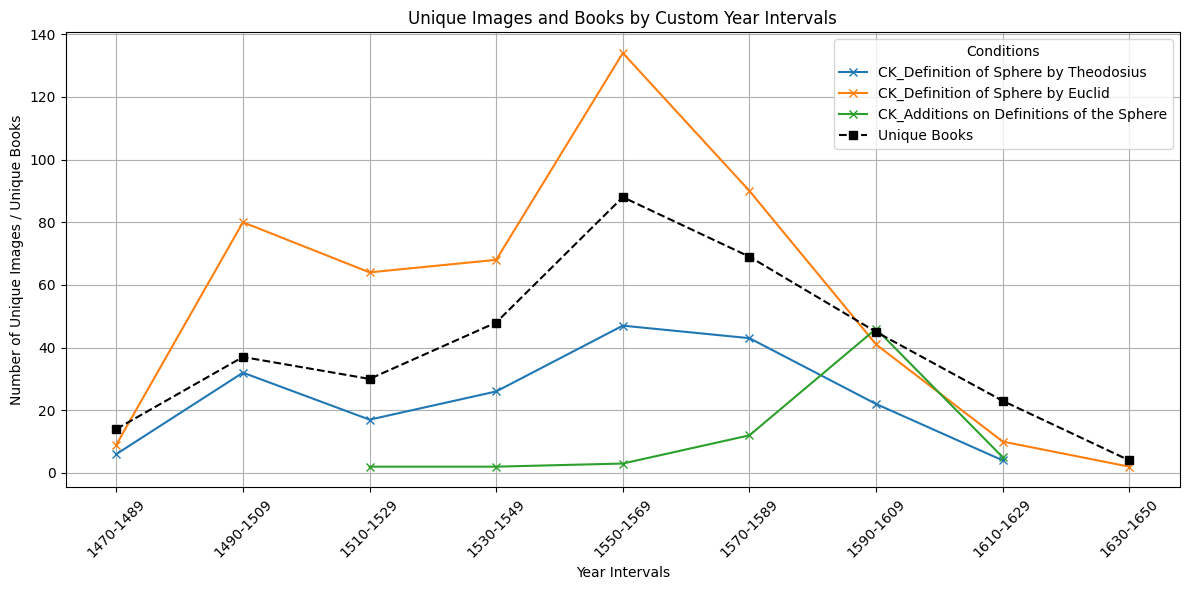

In [11]:
# Ensure filtered_df and books are treated as copies (if required)
filtered_df = filtered_df.copy()
books = books.copy()

# Ensure the year columns are of integer type (use .loc to avoid SettingWithCopyWarning)
filtered_df.loc[:, 'year'] = filtered_df['year'].astype(int)
books.loc[:, 'year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1650'
]

# Add 'interval' column to the filtered_df DataFrame based on custom bins (use .loc to avoid SettingWithCopyWarning)
filtered_df.loc[:, 'interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add 'interval' column to the books DataFrame (use .loc to avoid SettingWithCopyWarning)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define the keywords
keywords = [
    'CK_Definition of Sphere by Theodosius', 
    'CK_Definition of Sphere by Euclid', 
 #   'CK_Introduction to Geometry', 
    'CK_Additions on Definitions of the Sphere'
]

# Count images by keywords
unique_images_by_keyword = {}
for keyword in keywords:
    condition = filtered_df['cks'].apply(lambda x: keyword in x)
    unique_images_by_keyword[keyword] = filtered_df[condition].groupby('interval', observed=True)['images'].nunique()

# Step 3: Count unique books per year interval (use observed=True to avoid FutureWarning)
unique_books_count = books.groupby('interval', observed=True)['book'].nunique()

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Plot unique images for each keyword
for keyword, unique_images in unique_images_by_keyword.items():
    plt.plot(unique_images.index.astype(str), unique_images.values, label=keyword, marker='x')

# Plot the number of unique books as a dashed line
plt.plot(unique_books_count.index.astype(str), unique_books_count.values, label='Unique Books', marker='s', color='black', linestyle='--')

# Customize the plot
plt.title('Unique Images and Books by Custom Year Intervals')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='Conditions')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
#get visual tagging
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\VT_1.1_sphere_definition.xlsx'
visual_data = pd.read_excel(path_to_xlsx)
visual_data

label   space                     time lines/ color blocks  \
0   SIL_01618      3D  depending on connection               color   
1   SIL_02105      3D                       no               color   
2   SIL_01811      3D                       no               color   
3   SIL_01505  3D, 2D                       no        lines, color   
4   SIL_01567      3D  depending on connection               color   
5   SIL_02012      3D  depending on connection               color   
6   SIL_02087      3D  depending on connection               color   
7   SIL_02264      2D  depending on connection               color   
8   SIL_02521      2D                      yes               color   
9   SIL_02542      2D                       no               lines   
10  SIL_02556      2D                      yes               color   
11  SIL_02592      3D                      yes               color   
12  SIL_02697      3D                       no               lines   
13  SIL_02932      3D                      yes               color   
14  SIL_02959      2D  depending on connection               color   
15  SIL_03067      2D                       no               lines   
16  SIL_03225      3D  depending on connection               color   
17  SIL_03253      3D  depending on connection                both   
18  SIL_03261      3D  depending on connection               color   
19  SIL_03262      3D  depending on connection               color   
20  SIL_03309      3D  depending on connection               color   
21  SIL_03312      3D                      yes               color   
22  SIL_03356      3D                       no               lines   
23  SIL_03379      2D                      yes               color   
24  SIL_03406      3D                       no               color   
25  SIL_03417      2D                       no               lines   
26  SIL_03519      3D                      yes               color   
27  SIL_03576      3D                       no               color   
28  SIL_03826  3D, 2D                       no        lines, color   
29  SIL_00862      2D                       no               lines   
30  SIL_01512      2D                       no               lines   
31  SIL_02025      2D                       no               lines   
32  SIL_00609      3D                      yes               color   
33  SIL_00873      2D                       no               lines   
34  SIL_01736      2D                       no               lines   
35  SIL_01935      2D                       no               lines   
36  SIL_01576      2D                       no               lines   
37  SIL_02486      2D                       no               lines   
38  SIL_02728      3D                       no               lines   
39  SIL_03757      2D                       no               lines   
40  SIL_00108      2D                       no               lines   
41  SIL_00206      2D  depending on connection               color   
42  SIL_00240      3D  depending on connection               lines   
43  SIL_00340      3D                      yes               color   
44  SIL_00424      2D                       no               lines   
45  SIL_00452      3D  depending on connection               color   
46  SIL_00490  3D, 2D                       no        lines, color   
47  SIL_00530      2D                       no               lines   
48  SIL_03063      2D                       no               lines   
49  SIL_03582      2D                       no               lines   
50  SIL_00111      3D                       no               lines   
51  SIL_00975      2D                       no               lines   
52  SIL_01224      2D                      yes               lines   
53  SIL_00027      2D                       no               lines   
54  SIL_00085      3D  depending on connection               color   
55  SIL_00095      3D                      yes               color   
56  SIL_00104     

In [55]:
# Remove the 'SAC_' prefix from the 'cluster_name' column using .loc to avoid the SettingWithCopyWarning
filtered_df.loc[:, 'cluster_name_clean'] = filtered_df['cluster_name'].str.replace('SAC_', '', regex=False)

# Collect the cleaned data (no extraction of numbers)
cleaned_cluster_names = set(filtered_df['cluster_name_clean'])
cleaned_labels = set(visual_data['label'])

# Values not common between both sets
not_in_df = cleaned_cluster_names - cleaned_labels  # Values in filtered_df but not in visual_data
not_in_visual_data = cleaned_labels - cleaned_cluster_names  # Values in visual_data but not in filtered_df

# Output the results
print("Values in filtered_df (cluster_name) not in visual_data:", not_in_df)
print("Values in visual_data not in filtered_df:", not_in_visual_data)


Values in filtered_df (cluster_name) not in visual_data: set()
Values in visual_data not in filtered_df: set()


In [56]:
# Merge filtered_df and visual_data on 'cluster_name_clean' (from filtered_df) and 'label' (from visual_data)
merged_df = pd.merge(filtered_df, visual_data, left_on='cluster_name_clean', right_on='label', how='inner')
merged_df

images   cluster_name  \
0     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
1     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
2     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01224   
3     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_00975   
4     http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_00975   
...                                                 ...            ...   
1221  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_00424   
1222  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01935   
1223  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_01618   
1224  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_00609   
1225  http://dev.sphaera.mpiwg-berlin.mpg.de/contain...  SAC_SIL_00609   

                                        cks  \
0              CK_Measurements of the Earth   
1               CK_Introduction to Geometry   
2         CK_Definition of Sphere by Euclid   
3               CK_Introduction to Geometry   
4         CK_Definition of Sphere by Euclid   
...                                     ...   
1221  CK_Definition of Sphere by Theodosius   
1222  CK_Definition of Sphere by Theodosius   
1223      CK_Definition of Sphere by Euclid   
1224      CK_Definition of Sphere by Euclid   
1225      CK_Definition of Sphere by Euclid   

                                                   book   bid  \
0     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
1     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
2     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
3     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
4     http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...  1924   
...                                                 ...   ...   
1221  http://sphaera.mpiwg-berlin.mpg.de/id/item/f24...  2164   
1222  http://sphaera.mpiwg-berlin.mpg.de/id/item/f24...  2164   
1223  http://sphaera.mpiwg-berlin.mpg.de/id/item/f24...  2164   
1224  http://sphaera.mpiwg-berlin.mpg.de/id/item/f38...  1967   
1225  http://sphaera.mpiwg-berlin.mpg.de/id/item/069...  1760   

                                       part_or_adaption  \
0     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
1     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
2     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
3     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
4     http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
...                                                 ...   
1221  http://sphaera.mpiwg-berlin.mpg.de/id/part/5c5...   
1222  http://sphaera.mpiwg-berlin.mpg.de/id/part/5c5...   
1223  http://sphaera.mpiwg-berlin.mpg.de/id/part/5c5...   
1224  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   
1225  http://sphaera.mpiwg-berlin.mpg.de/id/adaption...   

                                 part_or_adaption_label  \
0             Anonymous commentary (foeliciter inchoat)   
1             Anonymous commentary (foeliciter inchoat)   
2             Anonymous commentary (foeliciter inchoat)   
3             Anonymous commentary (foeliciter inchoat)   
4             Anonymous commentary (foeliciter inchoat)   
...                                                 ...   
1221                         Quaestiones by S. Dietrich   
1222                         Quaestiones by S. Dietrich   
1223                         Quaestiones by S. Dietrich   
1224  Vinet 1584 - Commentary on Treatise on the Sph...   
1225  Translation and commentary by Des Bordes into ...   

                           type_label custom_identifier       place  ...  \
0                  Content, Annotated               322      Venice  ...   
1                  Content, Annotated               322      Venice  ...   
2                  Content, Annotated               322      Venice  ...   
3                  Content, Annotated               322      Venice  ...   
4               

In [57]:
# List of columns to check unique values
columns_to_check = [
    'space', 
#    'time', 
    'lines/ color blocks', 
    'disproportional decorative elements', 
    'lathe machine'
]

# Print unique values for each column
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(merged_df[column].unique())
    print()  # Add a blank line between each output for readability


Unique values in 'space':
['2D' '3D' '3D, 2D']

Unique values in 'lines/ color blocks':
['lines' 'color' 'lines, color' 'both']

Unique values in 'disproportional decorative elements':
['no' 'yes']

Unique values in 'lathe machine':
['no' 'yes' 'no, yes' '*diagram different subject']



In [58]:
# Modify the 'space' column
merged_df['3D'] = merged_df['space'].apply(lambda x: 'yes' if x in ['3D', '3D, 2D'] else 'no')

# Modify the 'lines/ color blocks' column
merged_df['color'] = merged_df['lines/ color blocks'].apply(lambda x: 'yes' if x in ['color', 'lines, color', 'both'] else 'no')

# Modify the 'disproportional decorative elements' column
merged_df['disproportional decorative elements'] = merged_df['disproportional decorative elements'].apply(lambda x: 'yes' if x == 'yes' else 'no')

# Modify the 'lathe machine' column
merged_df['lathe machine'] = merged_df['lathe machine'].apply(lambda x: 'yes' if x in ['yes', 'no, yes',] else 'no')

In [59]:
# List of columns to check unique values
columns_to_check = [
    '3D', 
    'color', 
    'disproportional decorative elements', 
    'lathe machine'
]

# Print unique values for each column
for column in columns_to_check:
    print(f"Unique values in '{column}':")
    print(merged_df[column].unique())
    print()  # Add a blank line between each output for readability

Unique values in '3D':
['no' 'yes']

Unique values in 'color':
['no' 'yes']

Unique values in 'disproportional decorative elements':
['no' 'yes']

Unique values in 'lathe machine':
['no' 'yes']



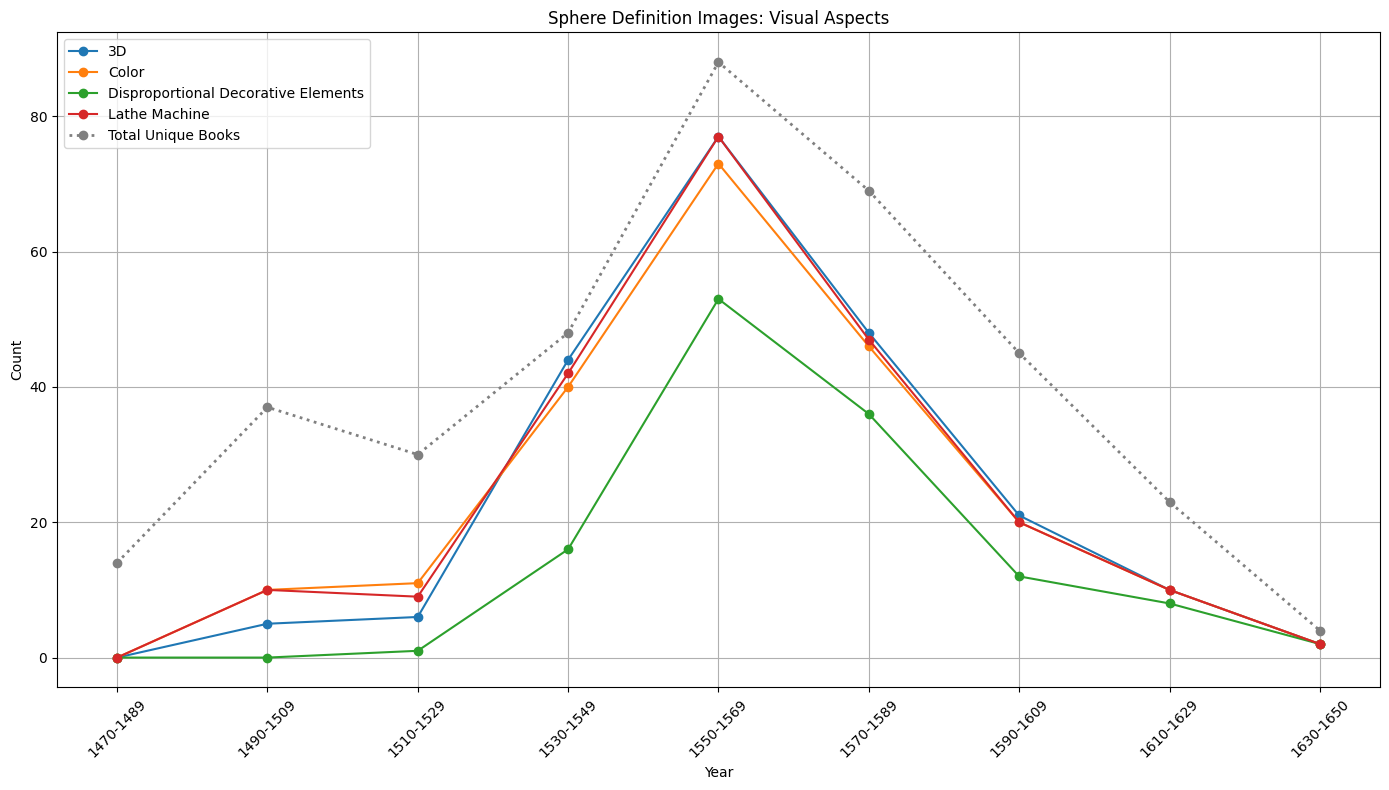

In [60]:
# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = merged_df[merged_df[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names and 'yes' condition
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
color = count_unique_images_by_column('color', 'yes')
disproportional_decorative_elements = count_unique_images_by_column('disproportional decorative elements', 'yes')
lathe_machine = count_unique_images_by_column('lathe machine', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Color': color,
    'Disproportional Decorative Elements': disproportional_decorative_elements,
    'Lathe Machine': lathe_machine
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = merged_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
#ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Sphere Definition Images: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

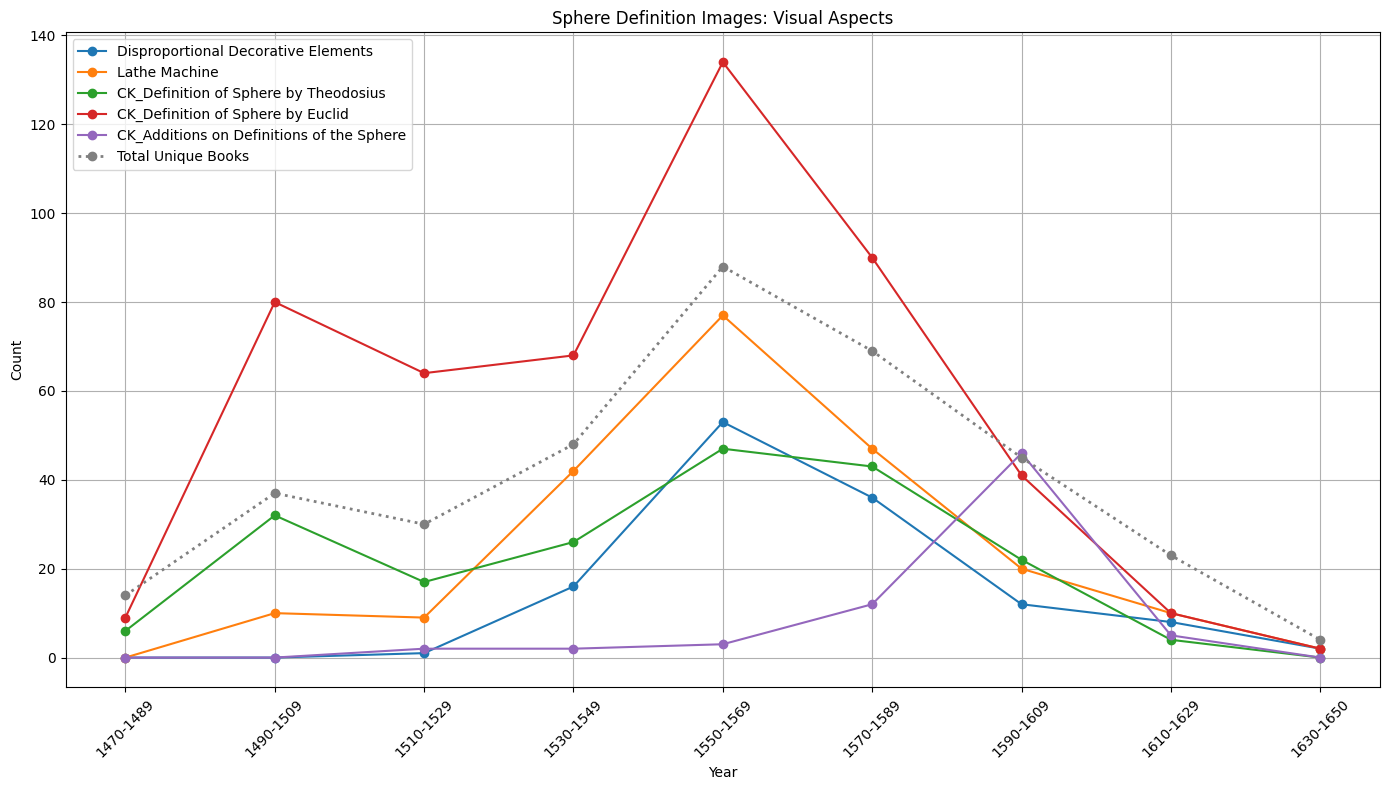

In [61]:
# Function to count unique images by cks values
def count_unique_images_by_cks_value(cks_value):
    # Filter the merged_df for the rows where the 'cks' column contains the given cks_value
    filtered_df = merged_df[merged_df['cks'].apply(lambda x: cks_value in x)]
    # Group by the 'interval' column and count unique images in 'images'
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Define the cks values to check
cks_values = [
    'CK_Definition of Sphere by Theodosius', 
    'CK_Definition of Sphere by Euclid', 
    'CK_Additions on Definitions of the Sphere'
]

# Collect unique images for each cks value
cks_image_counts = {}
for cks_value in cks_values:
    cks_image_counts[cks_value] = count_unique_images_by_cks_value(cks_value)

# Collect data with updated column names and 'yes' condition for other columns
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
color = count_unique_images_by_column('color', 'yes')
disproportional_decorative_elements = count_unique_images_by_column('disproportional decorative elements', 'yes')
lathe_machine = count_unique_images_by_column('lathe machine', 'yes')

# Combine the data for lines into a DataFrame
side_by_side_data = pd.DataFrame({
#    '3D': three_dimensions_effect,
#    'Color': color,
    'Disproportional Decorative Elements': disproportional_decorative_elements,
    'Lathe Machine': lathe_machine
})

# Add CKs values to the DataFrame
for cks_value in cks_values:
    side_by_side_data[cks_value] = cks_image_counts[cks_value]

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images_df = merged_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category (3D, Color, Disproportional Decorative Elements, Lathe Machine, and CKs images)
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot line for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images
#ax.plot(labels, total_unique_images_df, marker='o', linestyle='--', color='blue', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Sphere Definition Images: Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Define the updated mapping of places to categories
place_categories = {
    'Venice': 'Large centers',
    'Paris': 'Large centers',
    'Wittenberg': 'Large centers',
    'Antwerp': 'Medium centers',
    'Leipzig': 'Medium centers',
    'Frankfurt (Main)': 'Medium centers',
    'Lyon': 'Medium centers',
    'Cologne': 'Medium centers',
    'London': 'Medium centers',
    'Rome': 'Small centers',
    'Strasbourg': 'Small centers',
    'Seville': 'Small centers',
    'Leiden': 'Small centers',
    'Milan': 'Small centers',
    'Saint Gervais': 'Small centers',
    'Florence': 'Small centers',
    'Kraków': 'Small centers',
    'Salamanca': 'Small centers',
    'Lisbon': 'Small centers',
    'Bologna': 'Small centers',
    'Madrid': 'Small centers',
    'Sine loco': 'Small centers',
    'Basel': 'Small centers',
    'Lemgo': 'Small centers',
    'Dijon': 'Small centers',
    'Valladolid': 'Small centers',
    'Perugia': 'Small centers',
    'Siena': 'One book centers',
    'Avignon': 'One book centers',
    'Vienna': 'One book centers',
    'Ferrara': 'One book centers',
    'Padua': 'One book centers',
    'Nuremberg': 'One book centers',
    'Neustadt an der Weinstraße': 'One book centers',
    'Mexico City': 'One book centers',
    'Mainz': 'One book centers',
    'Coimbra': 'One book centers',
    'Leuven': 'One book centers',
    'Ingolstadt': 'One book centers',
    'Heidelberg': 'One book centers',
    'Geneva': 'One book centers',
    'Dillingen an der Donau': 'One book centers',
    'Alcalá de Henares': 'One book centers'
}

# Ensure 'place' column exists in merged_df and is in the format we expect
merged_df['place'] = merged_df['place'].astype(str)

# Create the 'place_category' column by mapping the 'place' column to categories
merged_df['place_category'] = merged_df['place'].map(place_categories)

# Group by 'place_category' and count the number of unique 'book' values and unique 'place' values in each category
unique_books_and_places_per_category = merged_df.groupby('place_category').agg(
    unique_books_count=('book', 'nunique'),
    unique_places_count=('place', 'nunique')
).reset_index()

# Print the unique place categories, the number of unique books, and the number of unique places
print(unique_books_and_places_per_category)


     place_category  unique_books_count  unique_places_count
0     Large centers                 147                    3
1    Medium centers                  59                    5
2  One book centers                  10                   10
3     Small centers                  28                   12


In [63]:
# Print the unique categories directly from the categorical 'interval' column
print(merged_df['interval'].cat.categories)


Index(['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569',
       '1570-1589', '1590-1609', '1610-1629', '1630-1650'],
      dtype='object')


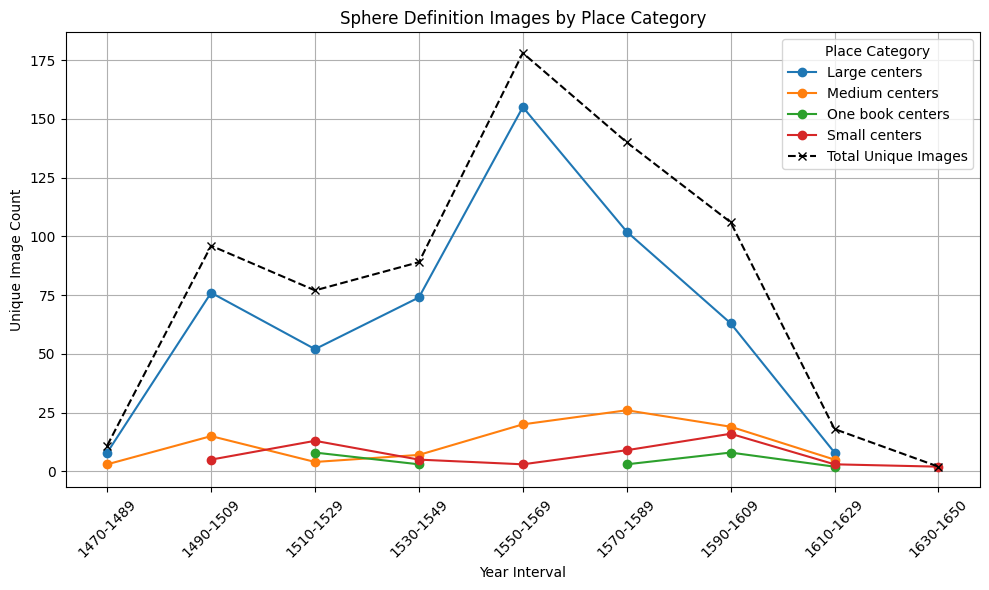

In [64]:
# Group by 'place_category' and 'year_interval', and count unique 'book' values
image_counts = merged_df.groupby(['place_category', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place_category', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique books in the entire merged_df for each 'year_interval'
total_images = merged_df.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique books as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Sphere Definition Images by Place Category')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


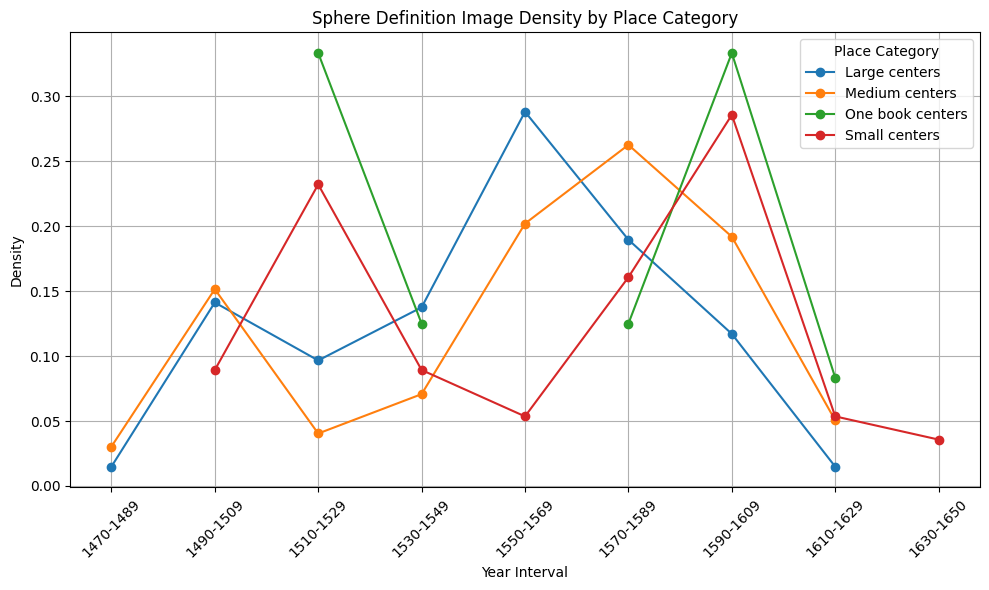

In [65]:
import matplotlib.pyplot as plt

# Group by 'place_category' and 'interval', and count unique 'images' values
image_counts = merged_df.groupby(['place_category', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place_category', values='images')

# Calculate the total number of unique images for each 'place_category'
total_images_by_category = merged_df.groupby('place_category', observed=False)['images'].nunique()

# Normalize the data by dividing the unique image counts by the total number of unique images for each 'place_category'
density_df = pivot_df.div(total_images_by_category, axis=1)

# Replace zero values with NaN to exclude them from the plot
density_df = density_df.where(density_df != 0)

# Plot the density as a line plot
ax = density_df.plot(kind='line', marker='o', figsize=(10, 6))

# Customize the plot
plt.title('Sphere Definition Image Density by Place Category')
plt.xlabel('Year Interval')
plt.ylabel('Density')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


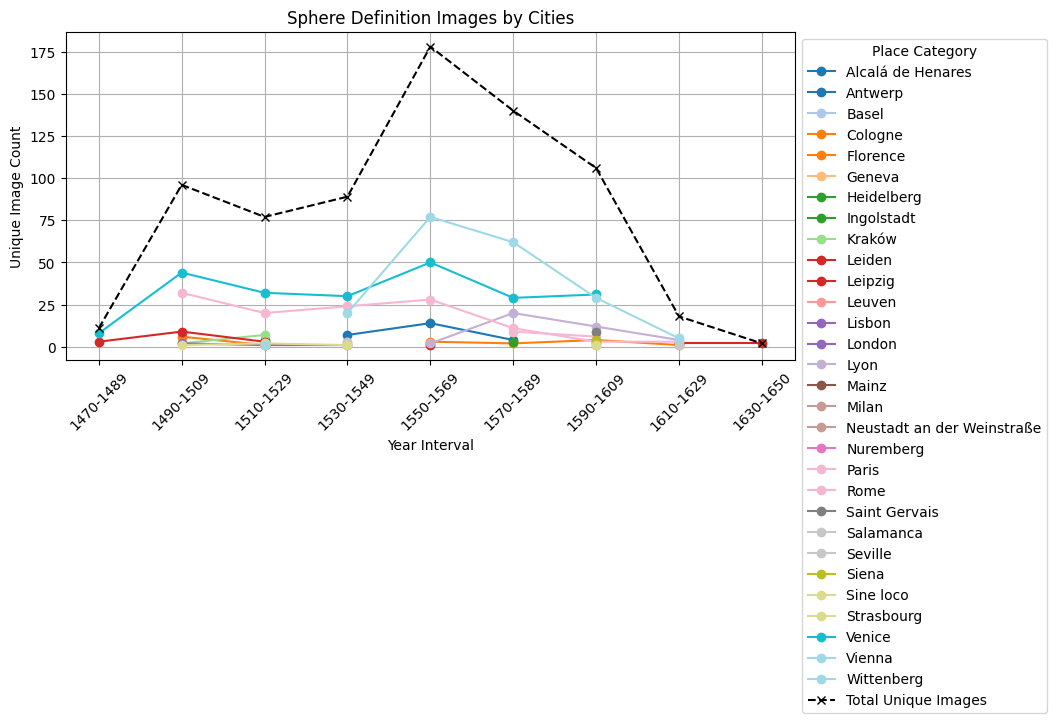

In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Group by 'place' and 'interval', and count unique 'images' values
image_counts = merged_df.groupby(['place', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Get a list of unique places (categories)
places = pivot_df.columns.tolist()

# Use 'tab20' colormap for more distinct colors (this colormap gives 20 distinct colors)
colors = cm.tab20(np.linspace(0, 1, len(places)))  # tab20 provides a wide set of distinct colors

# Plot the line plot for place categories with distinct colors
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6), color=colors)

# Calculate the total number of unique images in the entire merged_df for each 'year_interval'
total_images = merged_df.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique images as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Sphere Definition Images by Cities')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')

# Move the legend to a better position
plt.legend(title='Place Category', loc='upper left', bbox_to_anchor=(1, 1))

# Add grid
plt.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

# Adjust the right margin for the legend
plt.subplots_adjust(right=0.8)

# Show the plot
plt.show()


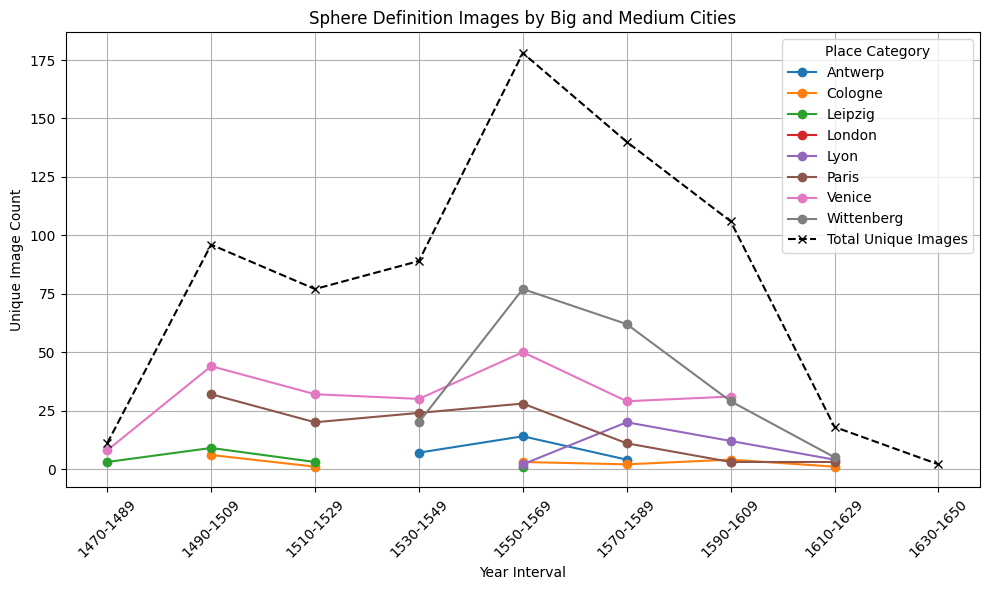

In [67]:
# Cities of interest
cities_of_interest = ['Antwerp', 'Leipzig', 'Frankfurt (Main)', 'Lyon', 'Cologne', 'London', 'Venice', 'Paris', 'Wittenberg']

# Filter the DataFrame for these cities
filtered_df = merged_df[merged_df['place'].isin(cities_of_interest)]

# Group by 'place_category' and 'year_interval', and count unique 'book' values
image_counts = filtered_df.groupby(['place', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique books in the entire merged_df for each 'year_interval'
total_images = merged_df.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique books as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Sphere Definition Images by Big and Medium Cities')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


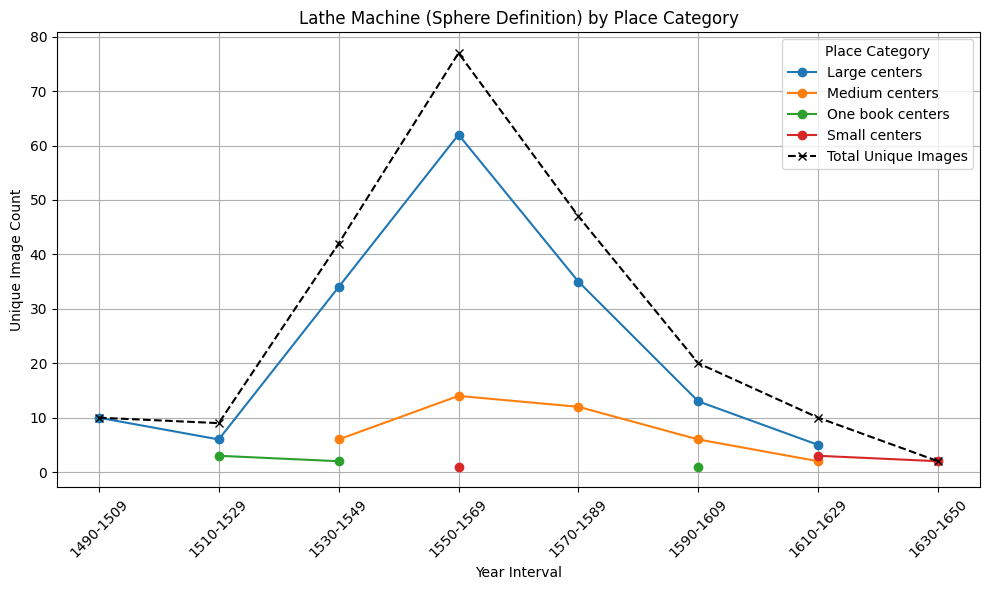

In [68]:
# Step 1: Filter the DataFrame for rows where 'lathe_machine' is 'yes'
lathe_machine_sphere_definition = merged_df[merged_df['lathe machine'] == 'yes']

# Group by 'place_category' and 'year_interval', and count unique 'images' values in the 'lathe_machine_sphere_definition' DataFrame
image_counts = lathe_machine_sphere_definition.groupby(['place_category', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place_category', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique images in the entire lathe_machine_sphere_definition for each 'year_interval'
total_images = lathe_machine_sphere_definition.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique images as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Lathe Machine (Sphere Definition) by Place Category')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()



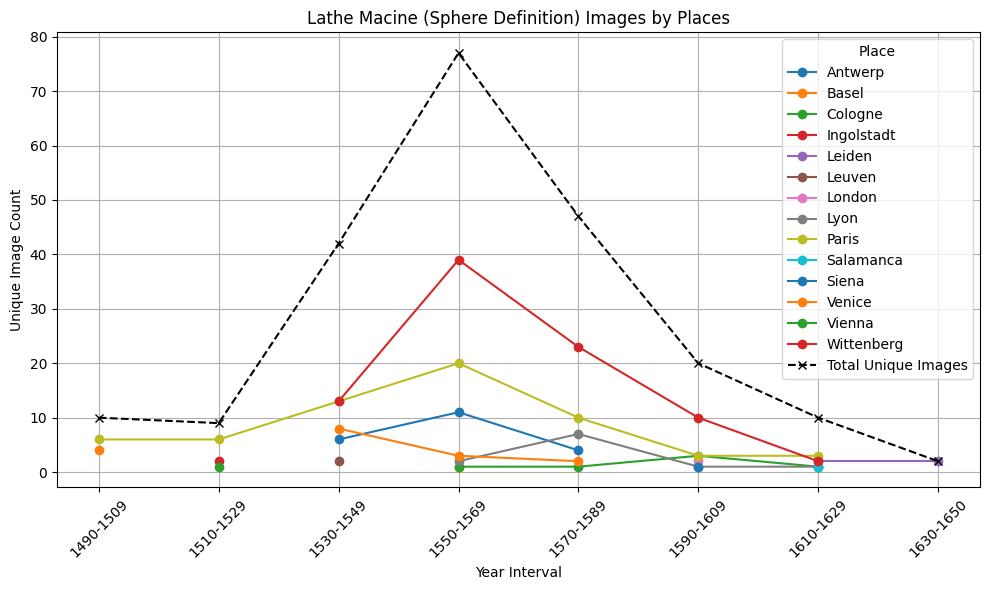

In [69]:
# Group by 'place' and 'interval', and count unique 'images' values
image_counts = lathe_machine_sphere_definition.groupby(['place', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place' as columns and 'interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for places
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique images in the entire lathe_machine_sphere_definition for each 'interval'
total_images = lathe_machine_sphere_definition.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique images as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Lathe Macine (Sphere Definition) Images by Places')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


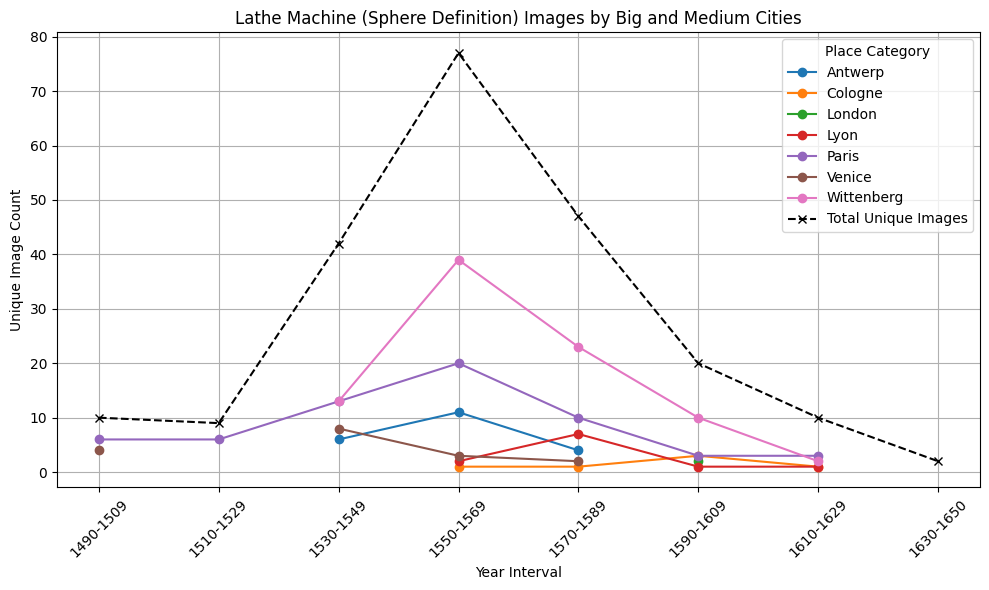

In [70]:


# Cities of interest
cities_of_interest = ['Antwerp', 'Leipzig', 'Frankfurt (Main)', 'Lyon', 'Cologne', 'London', 'Venice', 'Paris', 'Wittenberg']

# Filter the DataFrame for these cities
filtered_df = lathe_machine_sphere_definition[lathe_machine_sphere_definition['place'].isin(cities_of_interest)]

# Group by 'place_category' and 'year_interval', and count unique 'book' values
image_counts = filtered_df.groupby(['place', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique books in the entire merged_df for each 'year_interval'
total_images = lathe_machine_sphere_definition.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique books as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Lathe Machine (Sphere Definition) Images by Big and Medium Cities')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()


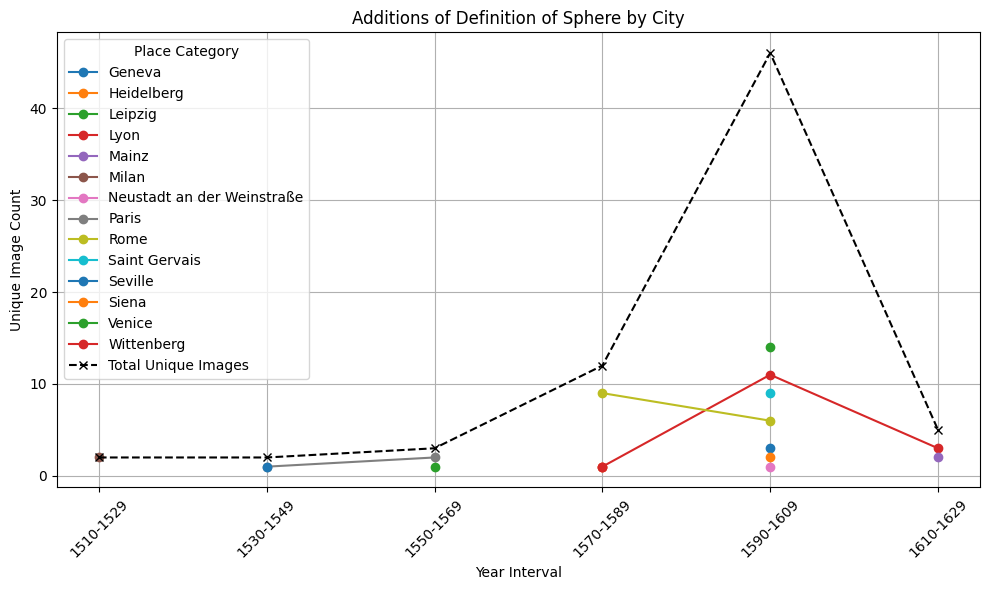

In [71]:
# Step 1: Filter the DataFrame for rows where 'lathe_machine' is 'yes'
additions_to_sphere_definition = merged_df[merged_df['cks'] == "CK_Additions on Definitions of the Sphere"]

# Group by 'place_category' and 'year_interval', and count unique 'images' values in the 'lathe_machine_sphere_definition' DataFrame
image_counts = additions_to_sphere_definition.groupby(['place', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique images in the entire lathe_machine_sphere_definition for each 'year_interval'
total_images = additions_to_sphere_definition.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique images as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Additions of Definition of Sphere by City')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()



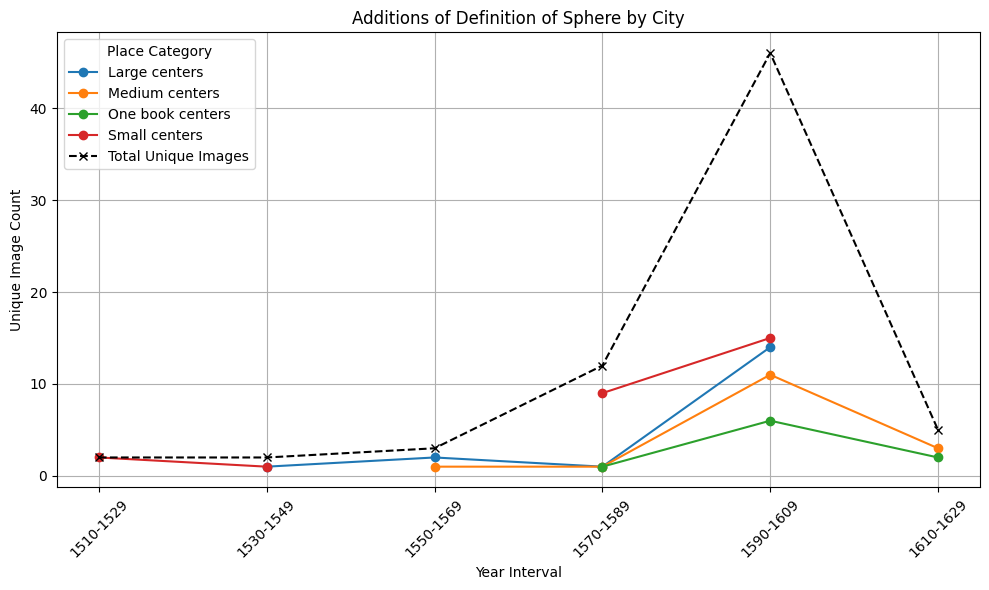

In [72]:
# Step 1: Filter the DataFrame for rows where 'lathe_machine' is 'yes'
additions_to_sphere_definition = merged_df[merged_df['cks'] == "CK_Additions on Definitions of the Sphere"]

# Group by 'place_category' and 'year_interval', and count unique 'images' values in the 'lathe_machine_sphere_definition' DataFrame
image_counts = additions_to_sphere_definition.groupby(['place_category', 'interval'], observed=False)['images'].nunique().reset_index()

# Pivot the data to have 'place_category' as columns and 'year_interval' as rows
pivot_df = image_counts.pivot(index='interval', columns='place_category', values='images')

# Replace zero values with NaN to exclude them from the plot
pivot_df = pivot_df.where(pivot_df != 0)

# Plot the line plot for place categories
ax = pivot_df.plot(kind='line', marker='o', figsize=(10, 6))

# Calculate the total number of unique images in the entire lathe_machine_sphere_definition for each 'year_interval'
total_images = additions_to_sphere_definition.groupby('interval', observed=False)['images'].nunique()

# Replace zero values with NaN for total_images as well
total_images = total_images.where(total_images != 0)

# Plot the total number of unique images as a broken black line
total_images.plot(kind='line', marker='x', color='black', linestyle='--', ax=ax, label='Total Unique Images')

# Customize the plot
plt.title('Additions of Definition of Sphere by City')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.legend(title='Place Category')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()



In [105]:
# Define the city_position dictionary (same as before)
city_position = {
    'Alcalá de Henares': (40.4818396, -3.3644973),
    'Antwerp': (51.2211097, 4.3997081),
    'Augsburg': (48.3690341, 10.8979522),
    'Avignon': (43.9492493, 4.8059012),
    'Basel': (47.5581077, 7.5878261),
    'Bologna': (44.4938203, 11.3426327),
    'Bordeaux': (44.841225, -0.5800364),
    'Coimbra': (40.2111931, -8.4294632),
    'Cologne': (43.7218277, 0.9774958),
    'Dijon': (47.3215806, 5.0414701),
    'Dillingen an der Donau': (48.5812791, 10.4951026),
    'Dortmund': (51.5142273, 7.4652789),
    'Ferrara': (44.8372737, 11.6186451),
    'Florence': (43.7697955, 11.2556404),
    'Frankfurt am Main': (50.1106444, 8.6820917),
    'Frankfurt an der Oder': (52.3412273, 14.549452),
    'Geneva': (46.2047169, 6.1423106290939335),
    'Heidelberg': (49.4093582, 8.694724),
    'Ingolstadt': (48.7630165, 11.4250395),
    'Kraków': (50.0469432, 19.997153435836697),
    'Leiden': (52.1594747, 4.4908843),
    'Leipzig': (51.3406321, 12.3747329),
    'Lemgo': (52.0280674, 8.9012894),
    'Leuven': (50.879202, 4.7011675),
    'Lisbon': (38.7077507, -9.1365919),
    'London': (51.4893335, -0.14405508452768728),
    'Lyon': (45.7578137, 4.8320114),
    'Madrid': (40.4167047, -3.7035825),
    'Mainz': (50.0012314, 8.2762513),
    'Mexico City': (19.4326296, -99.1331785),
    'Milan': (45.4641943, 9.1896346),
    'Neustadt an der Weinstraße': (49.3539802, 8.1350021),
    'Nuremberg': (49.453872, 11.077298),
    'Padua': (45.4077172, 11.8734455),
    'Paris': (48.8534951, 2.3483915),
    'Perugia': (43.1119613, 12.3890104),
    'Pesaro': (43.9098114, 12.9131228),
    'Rome': (41.8933203, 12.4829321),
    'Saint Gervais': (45.2022356, 5.4820229),
    'Salamanca': (40.9651572, -5.6640182),
    'Seville': (37.3886303, -5.9953403),
    'Siena': (43.3185536, 11.3316533),
    'Sine loco': None,
    'Strasbourg': (48.584614, 7.7507127),
    'Tournon': (45.0675156, 4.832852),
    'Tübingen': (48.5236164, 9.0535531),
    'Valladolid': (41.6521328, -4.728562),
    'Venice': (45.4371908, 12.3345898),
    'Vienna': (48.2083537, 16.3725042),
    'Wittenberg': (51.8666527, 12.646761)
}

# Assuming 'merged_df' is your existing DataFrame and has a 'place' column
# Create a function to map the place name to latitude and longitude
def get_coordinates(city):
    return city_position.get(city, (None, None))  # Returns None if city is not found in the dictionary

# Apply the function to create 'latitude' and 'longitude' columns
merged_df[['latitude', 'longitude']] = merged_df['place'].apply(lambda city: pd.Series(get_coordinates(city)))

# Display the updated DataFrame
#merged_df

# Drop rows where 'latitude' or 'longitude' is NaN
merged_df_clean = merged_df.dropna(subset=['latitude', 'longitude'])


In [106]:
import pandas as pd

# Initialize an empty list to store the rows for the new DataFrame
check_data = []

# Iterate over each unique interval
for interval in merged_df_clean['interval'].unique():
    # Filter the DataFrame for the current interval
    df_interval = merged_df_clean[merged_df_clean['interval'] == interval]
    
    # Calculate the number of unique image values
    num_unique_images = df_interval['images'].nunique()
    
    # Calculate the number of unique images where 'lathe machine' is 'yes'
    num_lathe_yes_images = df_interval[df_interval['lathe machine'] == 'yes']['images'].nunique()
    
    # Calculate the number of unique images where 'cks' value is "CK_Additions on Definitions of the Sphere"
    num_cks_images = df_interval[df_interval['cks'].str.strip() == "CK_Additions on Definitions of the Sphere"]['images'].nunique()
    
    # Calculate the number of unique place values
    num_unique_places = df_interval['place'].nunique()
    
    # Calculate the number of unique place values where 'lathe machine' is 'yes'
    num_lathe_yes_places = df_interval[df_interval['lathe machine'] == 'yes']['place'].nunique()
    
    # Calculate the number of unique place values where 'cks' value is "CK_Additions on Definitions of the Sphere"
    num_cks_places = df_interval[df_interval['cks'].str.strip() == "CK_Additions on Definitions of the Sphere"]['place'].nunique()
    
    # Append the results as a row to the check_data list
    check_data.append([
        interval, 
        num_unique_images, 
        num_lathe_yes_images, 
        num_cks_images, 
        num_unique_places, 
        num_lathe_yes_places, 
        num_cks_places
    ])

# Create the check DataFrame from the check_data list
check_df = pd.DataFrame(check_data, columns=[
    'interval', 
    'num_unique_images', 
    'num_lathe_yes_images', 
    'num_cks_images', 
    'num_unique_places', 
    'num_lathe_yes_places', 
    'num_cks_places'
])

check_df


interval  num_unique_images  num_lathe_yes_images  num_cks_images  \
0  1470-1489                 11                     0               0   
1  1490-1509                 96                    10               0   
2  1510-1529                 76                     9               2   
3  1530-1549                 89                    42               2   
4  1570-1589                140                    47              12   
5  1550-1569                178                    77               3   
6  1590-1609                105                    20              46   
7  1610-1629                 18                    10               5   
8  1630-1650                  2                     2               0   

   num_unique_places  num_lathe_yes_places  num_cks_places  
0                  2                     0               0  
1                  7                     2               0  
2                 12                     3               1  
3                  8                     5               2  
4                  8                     6               4  
5                  9                     7               2  
6                 11                     6               7  
7                  7                     6               2  
8                  1                     1               0

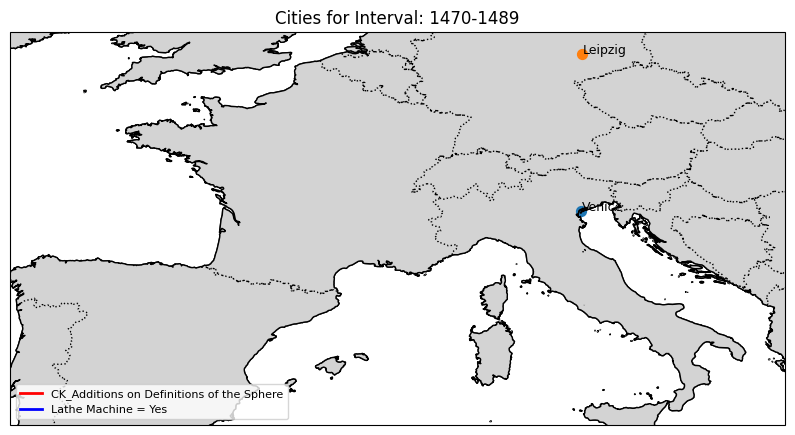

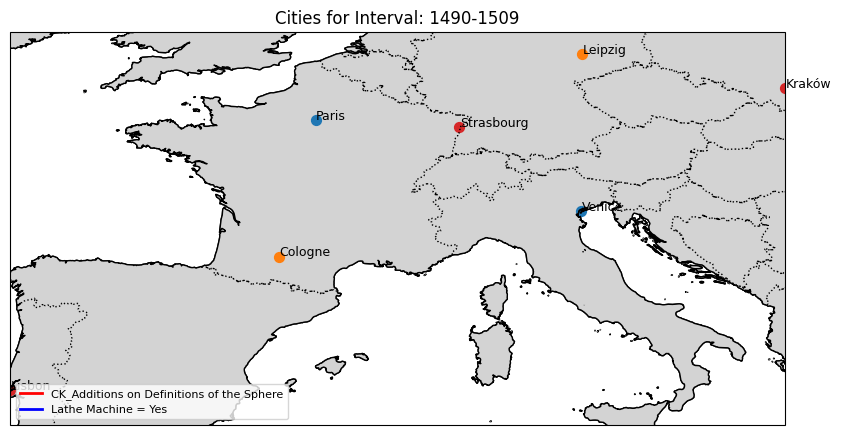

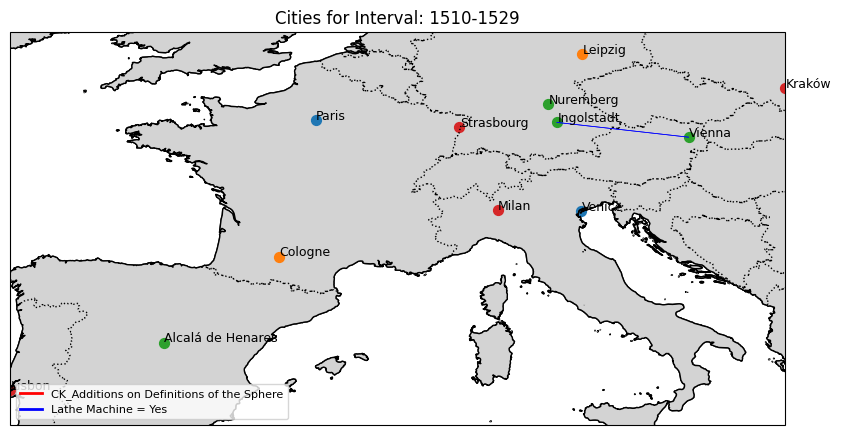

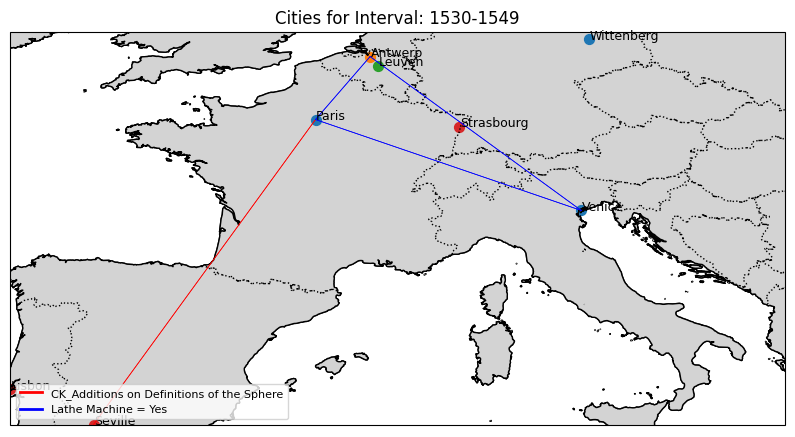

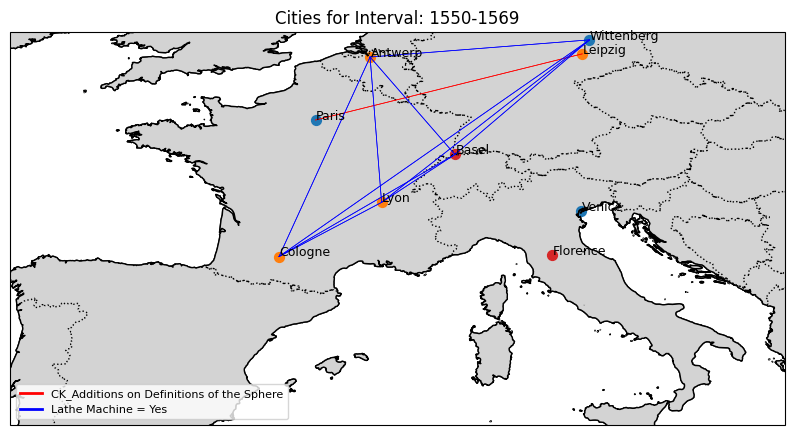

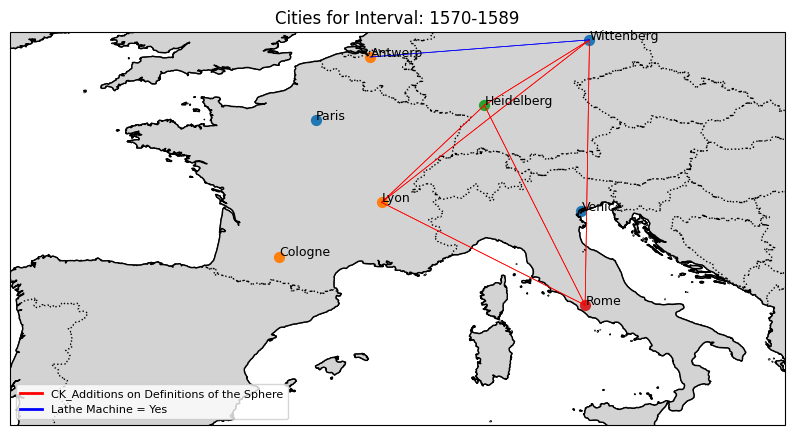

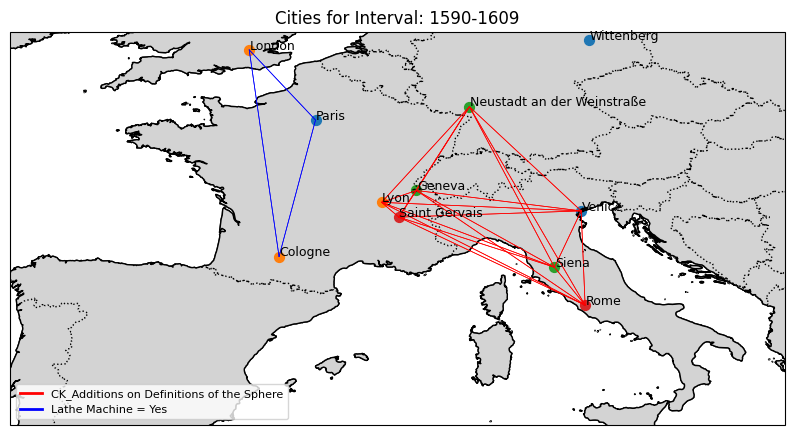

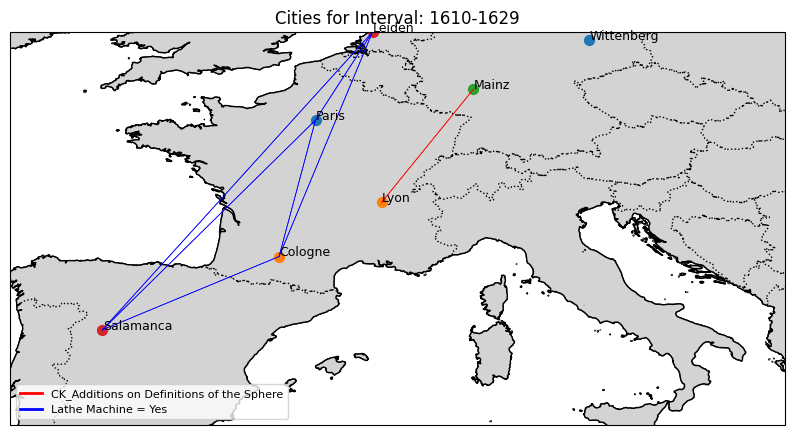

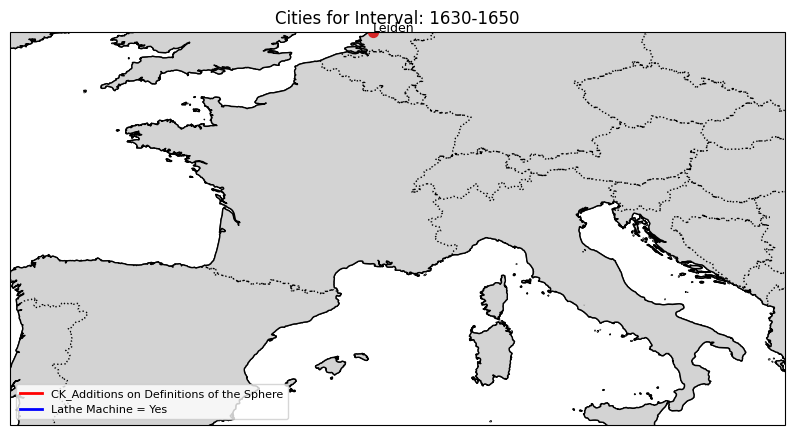

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Function to plot the map for each interval
def plot_static_map_for_interval(interval):
    # Create a new figure for each interval
    fig, ax = plt.subplots(figsize=(10, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add base map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Set map bounds
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Filter data for the current interval
    df_interval = merged_df_clean[merged_df_clean['interval'] == interval]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_interval, 
                           geometry=gpd.GeoSeries.from_xy(df_interval['longitude'], df_interval['latitude']),
                           crs="EPSG:4326")

    # Drop duplicate cities based on 'place' column
    gdf_unique_cities = gdf.drop_duplicates(subset=["place"])

    # Lists for storing cities based on conditions
    city_coords = []  # Store coordinates for lines
    city_lathe_yes = []  # Lathe machine 'yes'
    city_cks_condition = []  # CK_Additions condition

    # Plot all cities on the map
    for _, row in gdf_unique_cities.iterrows():
        category = row['place_category']
        color = category_to_color[category]  # Get color for place category

        # Plot the city circle with the assigned color
        ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())

        # Add the city name close to the point
        ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'], 
                color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

        # Check if this city meets the second condition (CK_Additions on Definitions of the Sphere)
        if any(df_interval[df_interval['place'] == row['place']]['cks'].str.strip() == "CK_Additions on Definitions of the Sphere"):
            city_cks_condition.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

        # Check if this city meets the first condition (Lathe Machine = Yes)
        if row['lathe machine'] == 'yes':
            city_lathe_yes.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

    # Draw lines between cities meeting the second condition (Red lines)
    for i, (_, lon1, lat1, _) in enumerate(city_cks_condition):
        for j, (_, lon2, lat2, _) in enumerate(city_cks_condition):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='red', linewidth=0.5, transform=ccrs.PlateCarree())

    # Draw lines between cities meeting the first condition (Blue lines)
    for i, (_, lon1, lat1, _) in enumerate(city_lathe_yes):
        for j, (_, lon2, lat2, _) in enumerate(city_lathe_yes):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=0.5, transform=ccrs.PlateCarree())

    # Set title for the current interval
    ax.set_title(f"Cities for Interval: {interval}")

    # Create the legend for place categories (circle colors)
    legend_labels = list(category_to_color.keys())
    legend_colors = list(category_to_color.values())
    place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_colors]

    # Add the place category legend
    ax.legend(handles=place_category_handles, labels=legend_labels, title="Place Category", loc="upper left", fontsize=8)

    # Add line color legends for the conditions
    ax.plot([], [], color='red', label="CK_Additions on Definitions of the Sphere", linewidth=2)  # Red lines for CK_Additions
    ax.plot([], [], color='blue', label="Lathe Machine = Yes", linewidth=2)  # Blue lines for Lathe Machine
    ax.legend(loc="lower left", fontsize=8)

    # Show the plot
    plt.show()

# Sort the intervals in chronological order
sorted_intervals = sorted(merged_df_clean['interval'].unique())

# Plot static maps for each time interval
for interval in sorted_intervals:
    plot_static_map_for_interval(interval)


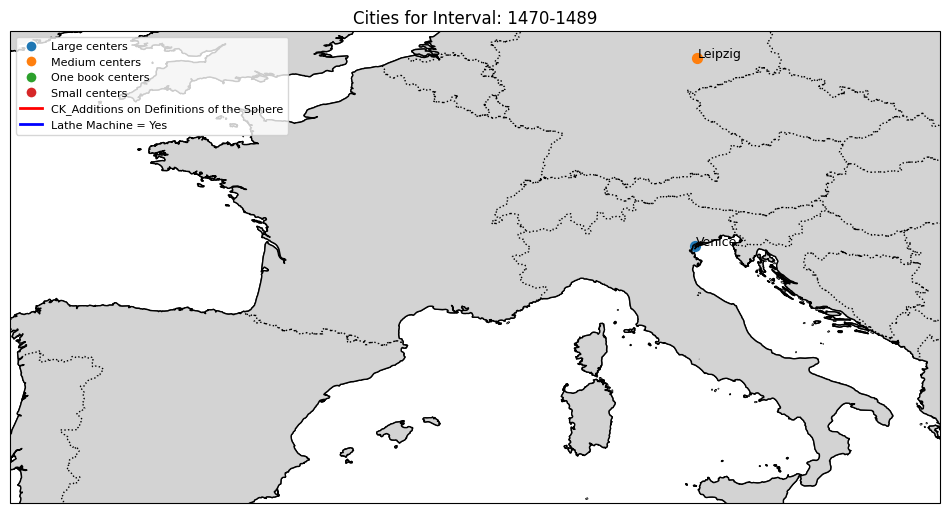

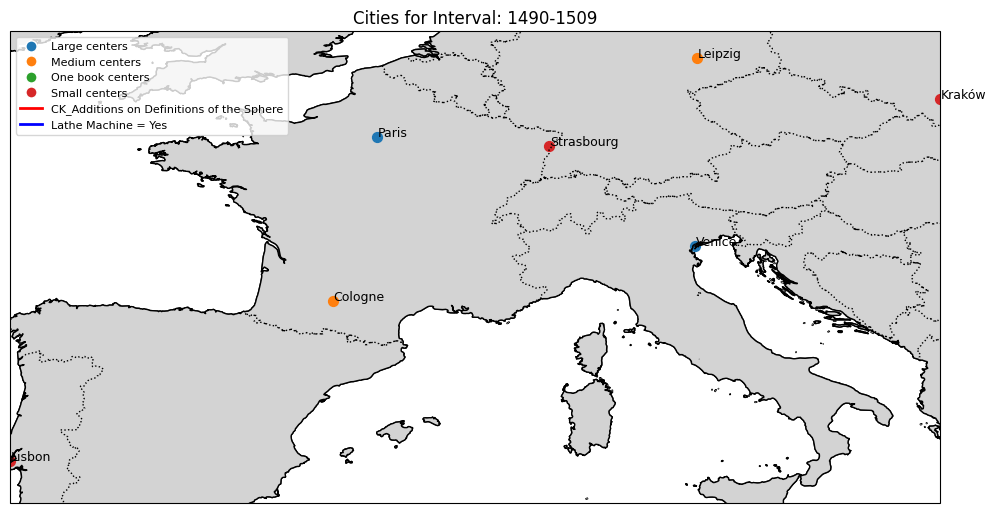

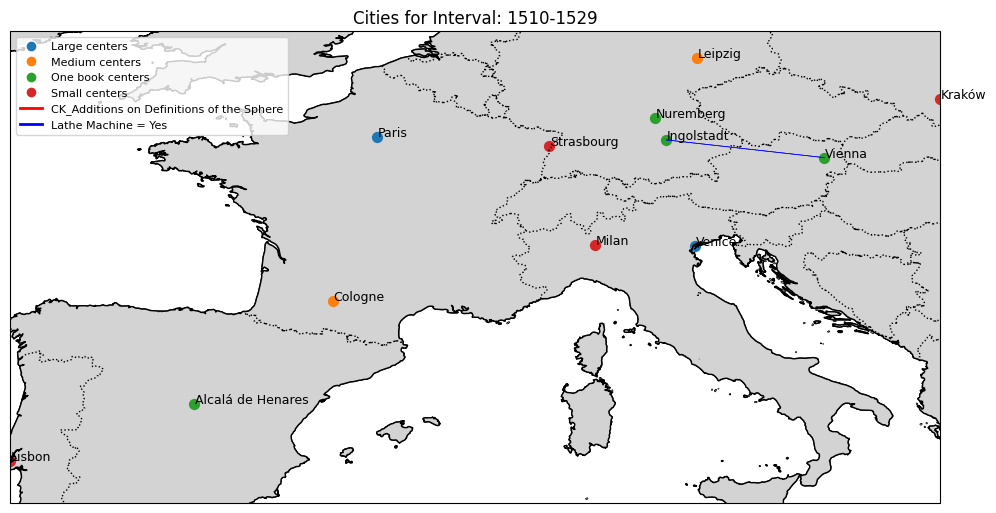

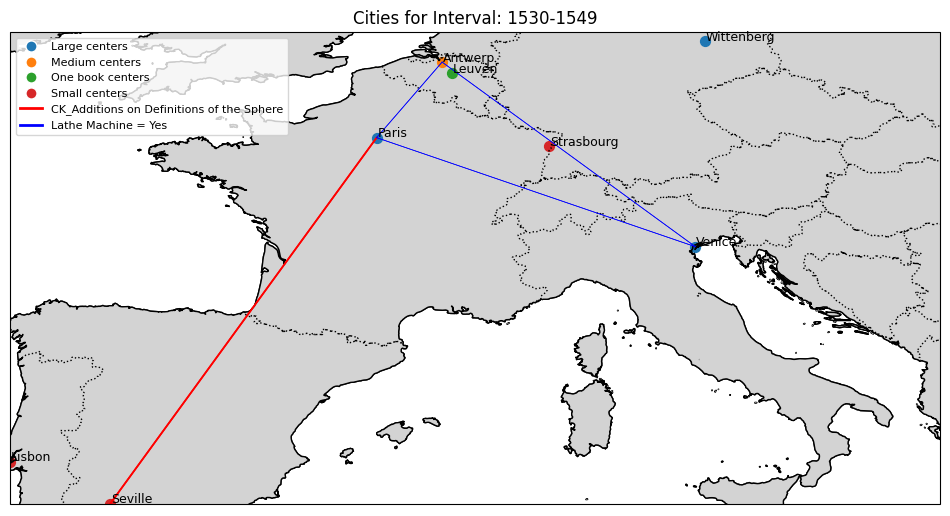

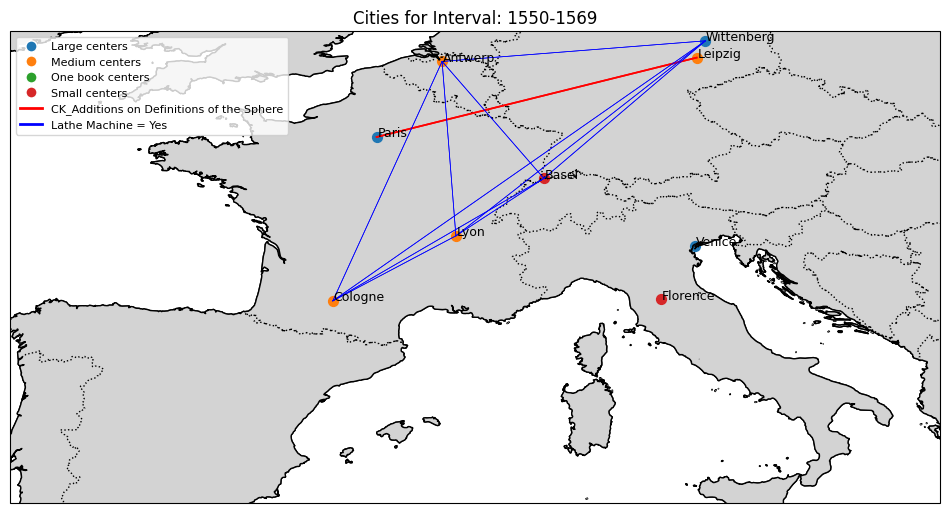

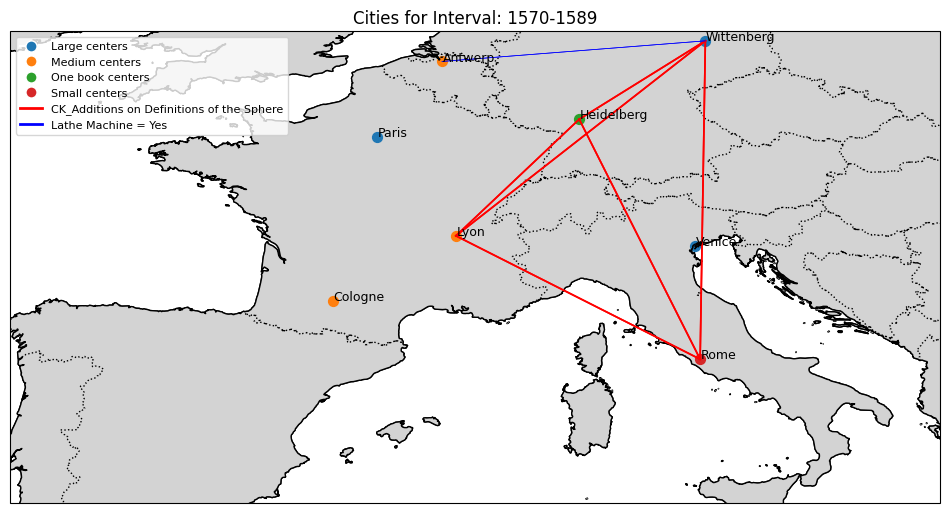

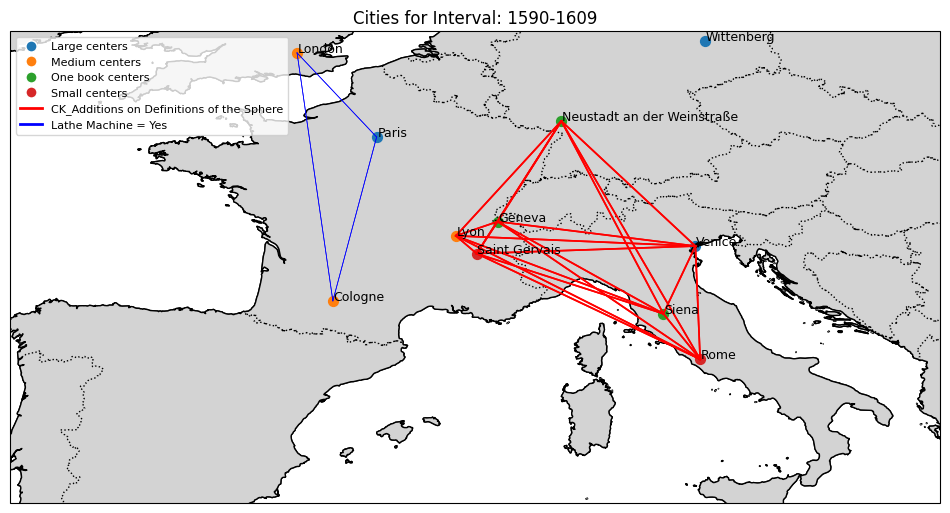

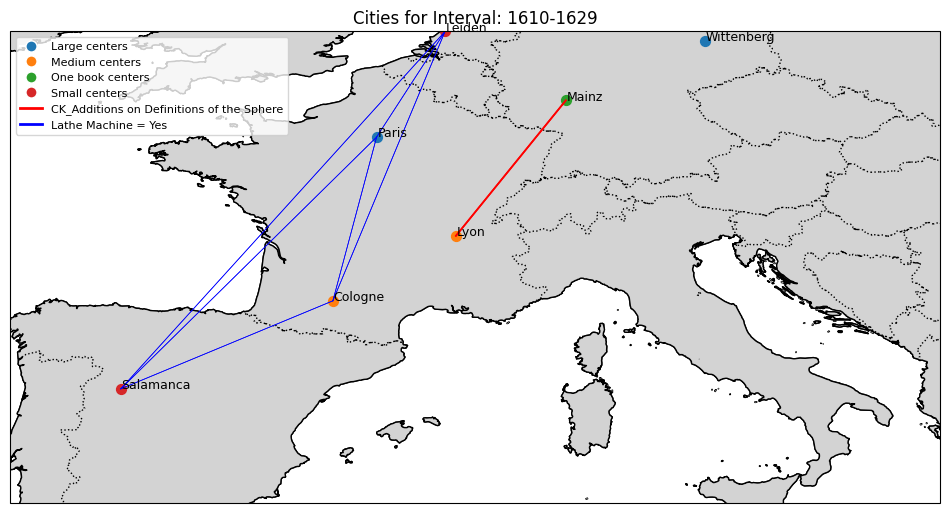

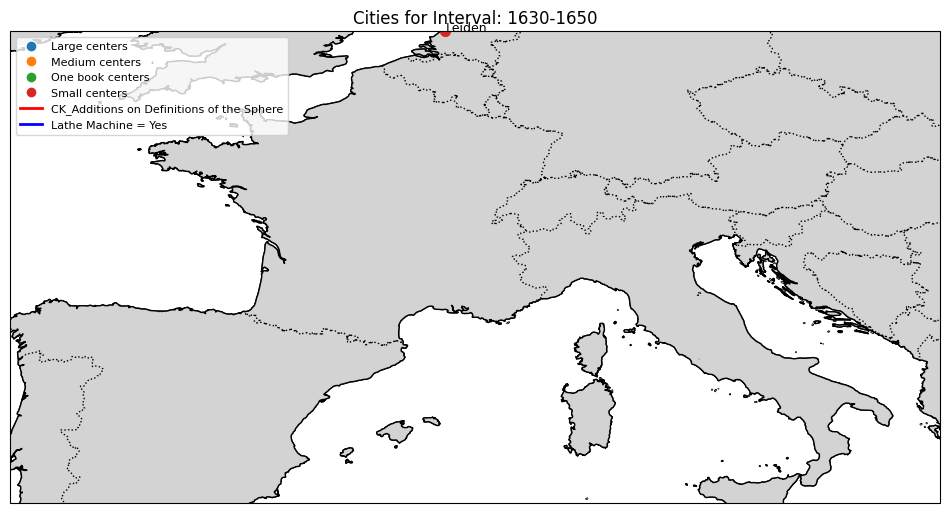

In [146]:
# Function to plot the map for each interval
def plot_static_map_for_interval(interval):
    # Create a new figure for each interval
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add base map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Set map bounds (adjust these values as per your data's extent)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Filter data for the current interval
    df_interval = merged_df_clean[merged_df_clean['interval'] == interval]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_interval, 
                           geometry=gpd.GeoSeries.from_xy(df_interval['longitude'], df_interval['latitude']),
                           crs="EPSG:4326")

    # Drop duplicate cities based on 'place' column
    gdf_unique_cities = gdf.drop_duplicates(subset=["place"])

    # Lists for storing cities based on conditions
    city_lathe_yes = []  # Lathe machine 'yes'
    city_cks_condition = []  # CK_Additions condition

    # Plot all cities on the map
    for _, row in gdf_unique_cities.iterrows():
        category = row['place_category']
        color = category_to_color[category]  # Get color for place category

        # Plot the city circle with the assigned color
        ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())

        # Add the city name close to the point
        ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'], 
                color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

        # Check if this city meets the second condition (CK_Additions on Definitions of the Sphere)
        if any(df_interval[df_interval['place'] == row['place']]['cks'].str.strip() == "CK_Additions on Definitions of the Sphere"):
            city_cks_condition.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

        # Check if this city meets the first condition (Lathe Machine = Yes)
        if row['lathe machine'] == 'yes':
            city_lathe_yes.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

    # Draw lines between cities meeting the second condition (Red lines)
    for i, (_, lon1, lat1, _) in enumerate(city_cks_condition):
        for j, (_, lon2, lat2, _) in enumerate(city_cks_condition):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='red', linewidth=1.2, transform=ccrs.PlateCarree())

    # Draw lines between cities meeting the first condition (Blue lines)
    for i, (_, lon1, lat1, _) in enumerate(city_lathe_yes):
        for j, (_, lon2, lat2, _) in enumerate(city_lathe_yes):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=0.5, transform=ccrs.PlateCarree())

    # Set title for the current interval
    ax.set_title(f"Cities for Interval: {interval}")

    # Create the legend for place categories (circle colors)
    legend_labels = list(category_to_color.keys())  # Get the place category labels (e.g., "Large Centers", "Medium Cities")
    legend_colors = list(category_to_color.values())  # Get the corresponding colors for the place categories
    
    # Create handles for the circles (place categories)
    place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_colors]
    
    # Create the line color handles (for conditions)
    line_handles = [
        plt.Line2D([0], [0], color='red', lw=2, label="CK_Additions on Definitions of the Sphere"),  # Red lines for CK_Additions
        plt.Line2D([0], [0], color='blue', lw=2, label="Lathe Machine = Yes")  # Blue lines for Lathe Machine
    ]
    
    # Combine both the circle handles and line handles into one list
    combined_handles = place_category_handles + line_handles
    combined_labels = legend_labels + ["CK_Additions on Definitions of the Sphere", "Lathe Machine = Yes"]
    
    # Add the combined legend to the plot
    ax.legend(handles=combined_handles, labels=combined_labels, loc="upper left", fontsize=8)
  
    # Show the plot
    plt.show()

# Sort the intervals in chronological order
sorted_intervals = sorted(merged_df_clean['interval'].unique())

# Plot static maps for each time interval
for interval in sorted_intervals:
    plot_static_map_for_interval(interval)


In [147]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Function to plot the map for each interval and save it as an image
def plot_static_map_for_interval(interval):
    # Create a new figure for each interval
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add base map features
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Set map bounds (adjust these values as per your data's extent)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

    # Filter data for the current interval
    df_interval = merged_df_clean[merged_df_clean['interval'] == interval]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_interval, 
                           geometry=gpd.GeoSeries.from_xy(df_interval['longitude'], df_interval['latitude']),
                           crs="EPSG:4326")

    # Drop duplicate cities based on 'place' column
    gdf_unique_cities = gdf.drop_duplicates(subset=["place"])

    # Lists for storing cities based on conditions
    city_lathe_yes = []  # Lathe machine 'yes'
    city_cks_condition = []  # CK_Additions condition

    # Plot all cities on the map
    for _, row in gdf_unique_cities.iterrows():
        category = row['place_category']
        color = category_to_color[category]  # Get color for place category

        # Plot the city circle with the assigned color
        ax.scatter(row['longitude'], row['latitude'], color=color, s=50, transform=ccrs.PlateCarree())

        # Add the city name close to the point
        ax.text(row['longitude'] + 0.02, row['latitude'] + 0.02, row['place'], 
                color='black', fontsize=9, ha='left', transform=ccrs.PlateCarree())

        # Check if this city meets the second condition (CK_Additions on Definitions of the Sphere)
        if any(df_interval[df_interval['place'] == row['place']]['cks'].str.strip() == "CK_Additions on Definitions of the Sphere"):
            city_cks_condition.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

        # Check if this city meets the first condition (Lathe Machine = Yes)
        if row['lathe machine'] == 'yes':
            city_lathe_yes.append((row['place'], row['longitude'], row['latitude'], color))  # Store coordinates and city name

    # Draw lines between cities meeting the second condition (Red lines)
    for i, (_, lon1, lat1, _) in enumerate(city_cks_condition):
        for j, (_, lon2, lat2, _) in enumerate(city_cks_condition):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='red', linewidth=1.2, transform=ccrs.PlateCarree())

    # Draw lines between cities meeting the first condition (Blue lines)
    for i, (_, lon1, lat1, _) in enumerate(city_lathe_yes):
        for j, (_, lon2, lat2, _) in enumerate(city_lathe_yes):
            if i != j:  # Avoid lines to the same city
                ax.plot([lon1, lon2], [lat1, lat2], color='blue', linewidth=0.5, transform=ccrs.PlateCarree())

    # Set title for the current interval
    ax.set_title(f"Cities for Interval: {interval}")

    # Create the legend for place categories (circle colors)
    legend_labels = list(category_to_color.keys())  # Get the place category labels
    legend_colors = list(category_to_color.values())  # Get the corresponding colors
    
    # Create handles for the circles (place categories)
    place_category_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_colors]
    
    # Create the line color handles (for conditions)
    line_handles = [
        plt.Line2D([0], [0], color='red', lw=2, label="CK_Additions on Definitions of the Sphere"),  # Red lines for CK_Additions
        plt.Line2D([0], [0], color='blue', lw=2, label="Lathe Machine = Yes")  # Blue lines for Lathe Machine
    ]
    
    # Combine both the circle handles and line handles into one list
    combined_handles = place_category_handles + line_handles
    combined_labels = legend_labels + ["CK_Additions on Definitions of the Sphere", "Lathe Machine = Yes"]
    
    # Add the combined legend to the plot
    ax.legend(handles=combined_handles, labels=combined_labels, loc="upper left", fontsize=8)

    # Save the plot as an image (e.g., PNG file) with a dynamic filename based on the interval
    plt.savefig(f"plot_{interval}.png", dpi=300, bbox_inches='tight')  # Save with high DPI and tight bounding box
    plt.close(fig)  # Close the plot after saving to avoid memory issues

# Sort the intervals in chronological order
sorted_intervals = sorted(merged_df_clean['interval'].unique())

# Plot static maps for each time interval
for interval in sorted_intervals:
    plot_static_map_for_interval(interval)

